# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

weather_api_key = "dbea2f2271b7add3698326d3ed5a1a91"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']-273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vilyuchinsk
Processing Record 2 of Set 1 | sinabang
Processing Record 3 of Set 1 | crane
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | vorgashor
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | isafjordur
Processing Record 9 of Set 1 | buka
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | dakhla
Processing Record 12 of Set 1 | nagqu
Processing Record 13 of Set 1 | ancud
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | atafu village
Processing Record 16 of Set 1 | qaqortoq
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | margaret river
Processing Record 19 of Set 1 | papao
Processing Record 20 of Set 1 | tazovsky
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 of Set 1 | east london


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vilyuchinsk,52.9306,158.4028,-1.85,77,2,3.07,RU,1745167531
1,sinabang,2.4803,96.3801,26.90,81,99,3.24,ID,1745167533
2,crane,31.3974,-102.3501,15.85,35,0,6.68,US,1745167534
3,port-aux-francais,-49.3500,70.2167,6.48,92,95,11.44,TF,1745167535
4,port elizabeth,-33.9180,25.5701,19.06,97,20,7.72,ZA,1745167536


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,-1.85,77,2,3.07,RU,1745167531
1,sinabang,2.4803,96.3801,26.90,81,99,3.24,ID,1745167533
2,crane,31.3974,-102.3501,15.85,35,0,6.68,US,1745167534
3,port-aux-francais,-49.3500,70.2167,6.48,92,95,11.44,TF,1745167535
4,port elizabeth,-33.9180,25.5701,19.06,97,20,7.72,ZA,1745167536


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

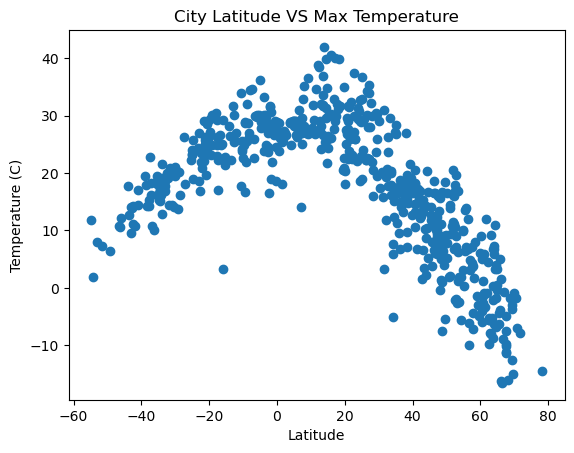

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude VS Max Temperature")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

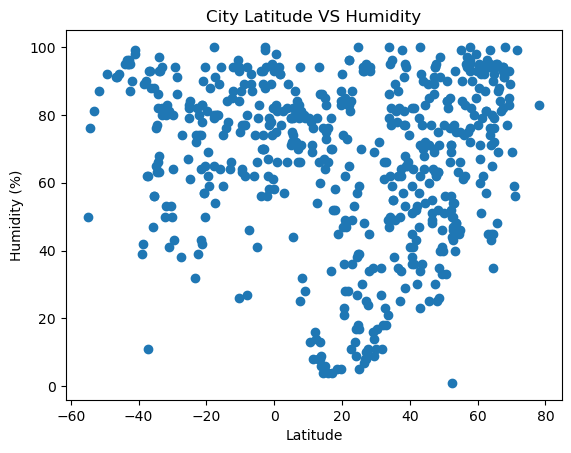

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude VS Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

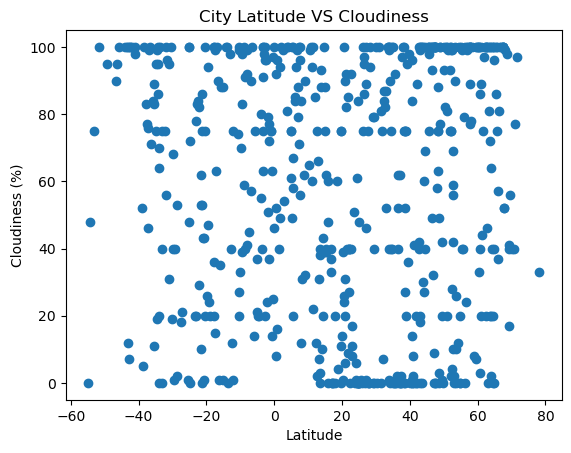

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude VS Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

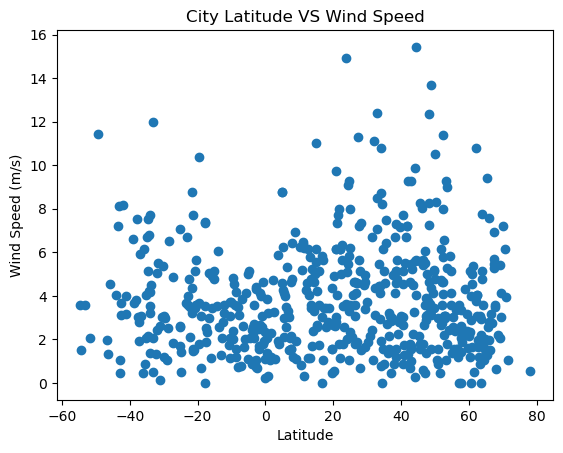

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude VS Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def linregress_plot(x, y):
    # Perform linear regression
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)

    # Calculate the regression line
    regression_line = x * slope + intercept

    # Calculate r^2 value
    r_squared = rvalue**2
  
    line_equation = f"y = {round(slope,2)}x + {round(intercept, 2)}"

    # Create the plot
    plt.scatter(x, y, color = "blue", label = "Data points", marker = "o")
    plt.plot(x, regression_line, color = "red", label=f"Regression line ($R^2$ = {r_squared:.2f})")
    plt.annotate(line_equation, (x.min() , y.min()), color = "r", fontsize = 12)
    plt.tight_layout()

    # Return r^2 value for future plots
    return r_squared

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,-1.85,77,2,3.07,RU,1745167531
1,sinabang,2.4803,96.3801,26.90,81,99,3.24,ID,1745167533
2,crane,31.3974,-102.3501,15.85,35,0,6.68,US,1745167534
5,vorgashor,67.5833,63.9500,-11.35,94,100,5.30,RU,1745167537
7,isafjordur,66.0755,-23.1240,1.60,69,37,2.82,IS,1745167539


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,port-aux-francais,-49.3500,70.2167,6.48,92,95,11.44,TF,1745167535
4,port elizabeth,-33.9180,25.5701,19.06,97,20,7.72,ZA,1745167536
6,blackmans bay,-43.0167,147.3167,14.07,95,12,0.45,AU,1745167538
12,ancud,-41.8697,-73.8203,10.82,90,100,8.18,CL,1745167358
13,hermanus,-34.4187,19.2345,17.11,82,100,6.79,ZA,1745167546


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7510114787216059


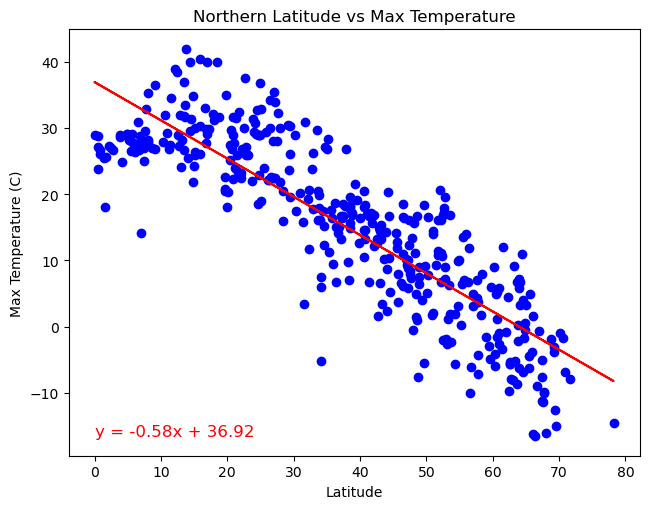

In [26]:
# Linear regression on Northern Hemisphere
r_squared = linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Northern Latitude vs Max Temperature")
print(f"The r^2-value is: {r_squared}")
plt.show()

The r^2-value is: 0.6043394080787695


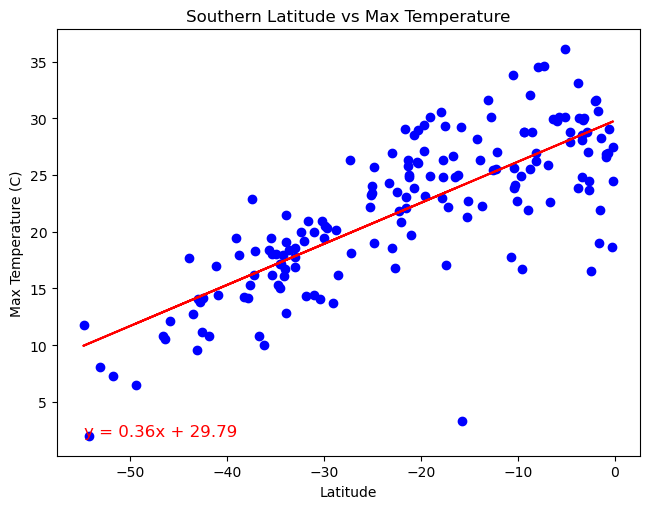

In [27]:
# Linear regression on Southern Hemisphere
r_squared = linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Southern Latitude vs Max Temperature")
print(f"The r^2-value is: {r_squared}")
plt.show()

**Discussion about the linear relationship:** There is a clear negative linear relationship between latitude and maximum temperature in both hemispheres, indicating that temperatures generally decrease as you move further from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r^2-value is: 0.0554628044618758


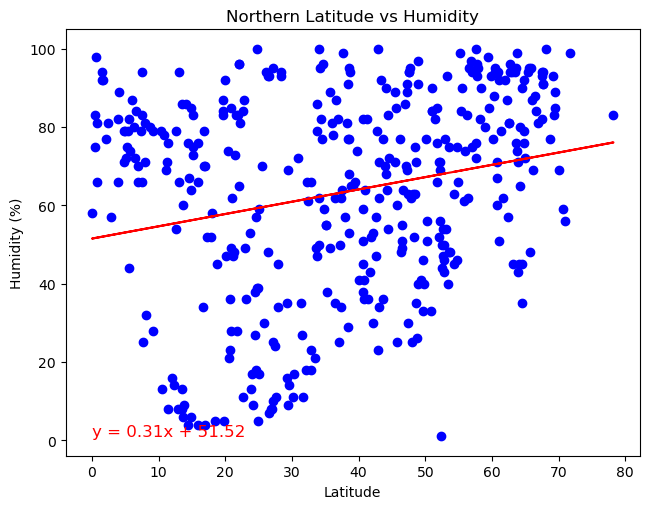

In [28]:
# Northern Hemisphere
r_squared = linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Latitude vs Humidity")
print(f"The r^2-value is: {r_squared}")
plt.show()

The r^2-value is: 0.0010800369180222233


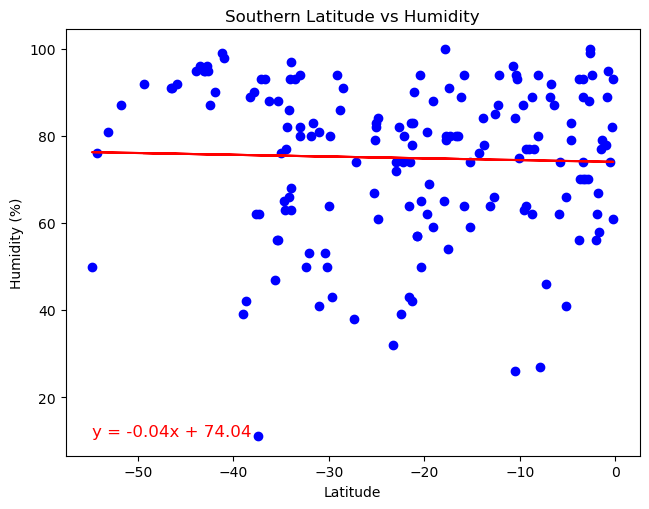

In [29]:
# Southern Hemisphere
r_squared = linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Latitude vs Humidity")
print(f"The r^2-value is: {r_squared}")
plt.show()

**Discussion about the linear relationship:** There’s no clear relationship between latitude and humidity in either hemisphere—those super low r²-values show it's pretty random.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: 0.013454716457855388


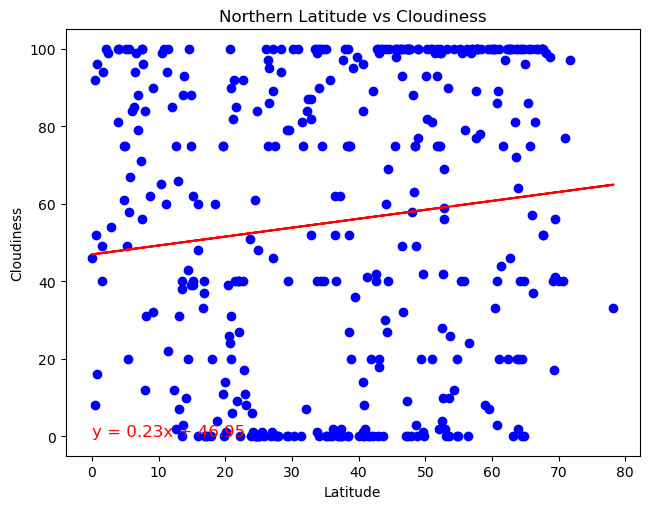

In [30]:
# Northern Hemisphere
r_squared = linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Latitude vs Cloudiness")
print(f"The r^2-value is: {r_squared}")
plt.show()

The r^2-value is: 0.004704292247632892


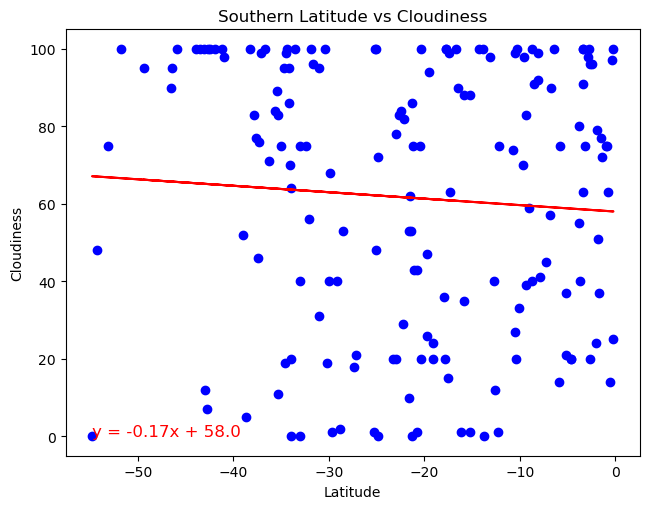

In [31]:
# Southern Hemisphere
r_squared = linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Latitude vs Cloudiness")
print(f"The r^2-value is: {r_squared}")
plt.show()

**Discussion about the linear relationship:** There's no real pattern between latitude and cloudiness in either hemisphere—those r²-values are way too low to determine anything.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is: 0.002733703554182472


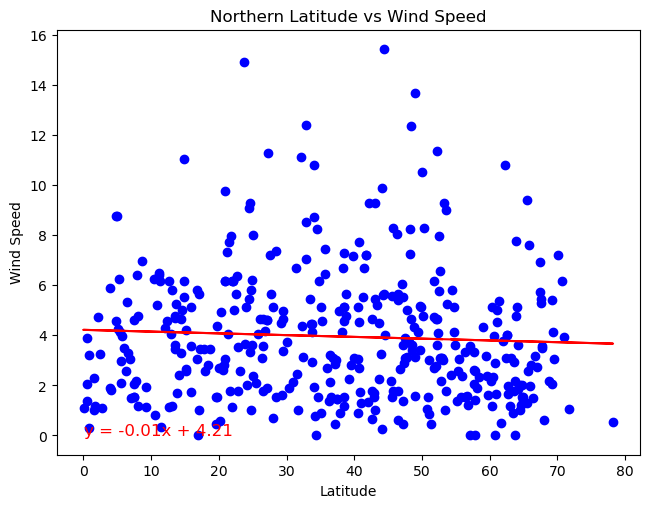

In [32]:
# Northern Hemisphere
r_squared = linregress_plot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Latitude vs Wind Speed")
print(f"The r^2-value is: {r_squared}")
plt.show()

The r^2-value is: 0.059656872915763326


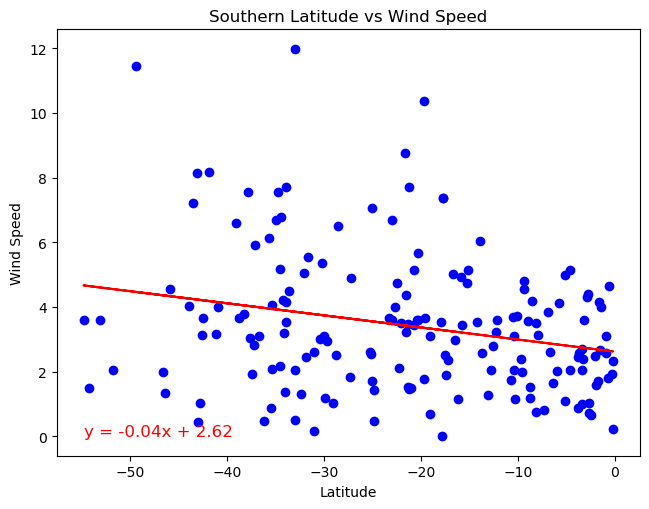

In [33]:
# Southern Hemisphere
r_squared = linregress_plot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Latitude vs Wind Speed")
print(f"The r^2-value is: {r_squared}")
plt.show()

**Discussion about the linear relationship:** It seems that wind speed doesn’t really depend on latitude either. both r² values are super low so there's basically no clear relationship.